In [12]:
import random

import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import join

from PIL import Image

IMAGE_SHAPE = (64, 64)

In [13]:
def load_images(n=100, path="./images/"):
    images = []
    for i, image_file in enumerate(listdir(path)):
        if i == n: break
        image = Image.open(join(path, image_file)).convert("L")
        image = image.resize(IMAGE_SHAPE)
        images.append(np.array(image))
    random.shuffle(images)
    return images

In [14]:
images = np.array(load_images(n=20000), dtype=float)
images /= 255.0
print(images.shape)

(20000, 64, 64)


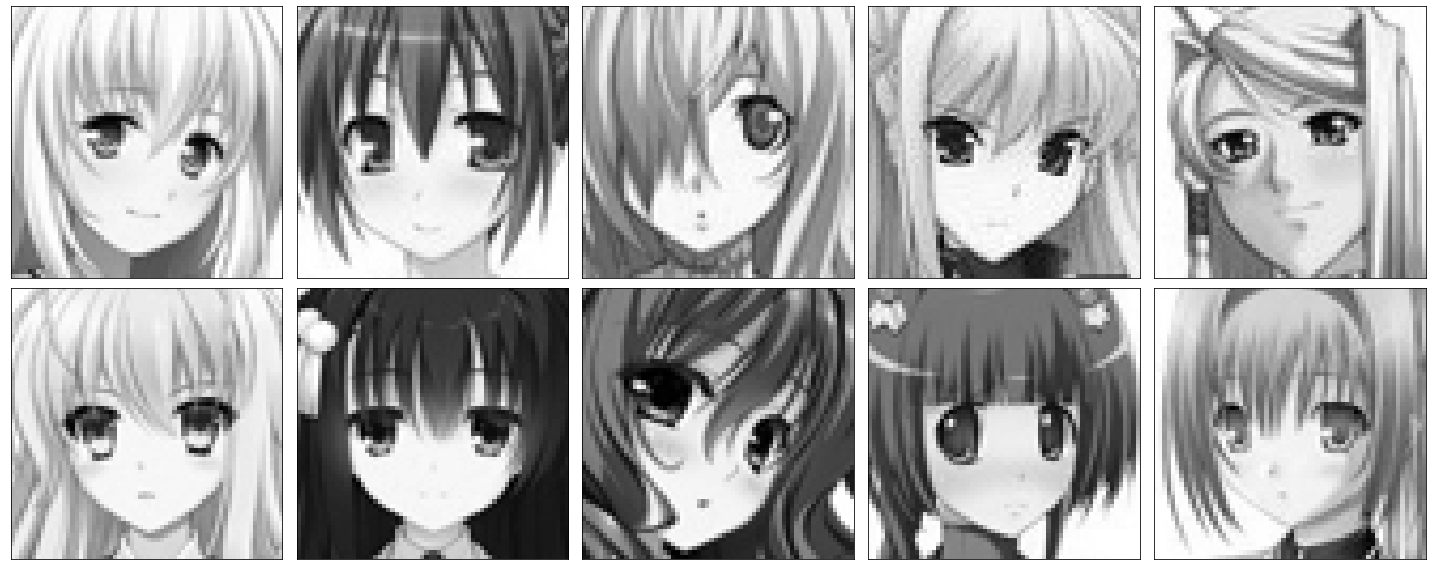

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8), subplot_kw={"xticks": (), "yticks": ()})
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
fig.tight_layout()

In [16]:
from sklearn.decomposition import PCA
data = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
print(data.shape)
mean = np.mean(data, axis=0)
std  = np.std(data, axis=0, ddof=1)

data = (data - mean) / std

pca = PCA(n_components=2, whiten=True)
z = pca.fit_transform(data)

(20000, 4096)


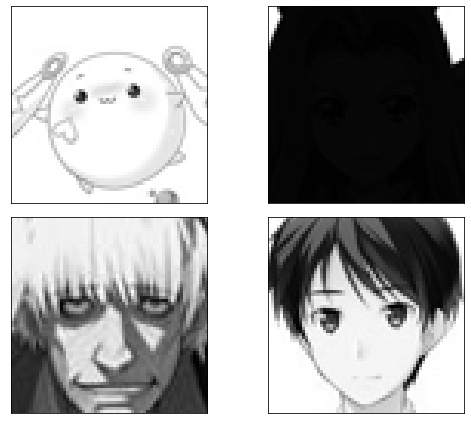

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), subplot_kw={"xticks": (), "yticks": ()})
z_min = np.argmin(z[:, 0])
z_max = np.argmax(z[:, 0])
ax[0][0].imshow(images[z_min], cmap=plt.cm.gray)
ax[0][1].imshow(images[z_max], cmap=plt.cm.gray)
z_min = np.argmin(z[:, 1])
z_max = np.argmax(z[:, 1])
ax[1][0].imshow(images[z_min], cmap=plt.cm.gray)
ax[1][1].imshow(images[z_max], cmap=plt.cm.gray)
fig.tight_layout()

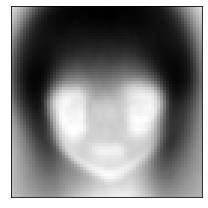

In [18]:
eigenface = np.reshape(pca.components_[0], IMAGE_SHAPE)
fig, ax = plt.subplots(1, 1, figsize=(4, 3), subplot_kw={"xticks": (), "yticks": ()})
ax.imshow(eigenface, cmap=plt.cm.gray)
fig.tight_layout()

0.7418985282032171

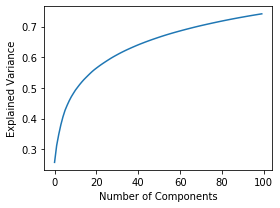

In [19]:
n_components = 100
pca = PCA(n_components=n_components, whiten=True)
z = pca.fit_transform(data)

rng = range(n_components)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
ax.plot(rng, [np.cumsum(pca.explained_variance_ratio_)[n] for n in rng])
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")
fig.tight_layout()
np.sum(pca.explained_variance_ratio_)

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(z)
for i, _ in enumerate(kmeans.cluster_centers_):
    print("cluster", i, "count:", np.count_nonzero(kmeans.labels_ == i))
print(kmeans.n_iter_, "iterations")

cluster 0 count: 2366
cluster 1 count: 1109
cluster 2 count: 1078
cluster 3 count: 2729
cluster 4 count: 2424
cluster 5 count: 1749
cluster 6 count: 4802
cluster 7 count: 1400
cluster 8 count: 1116
cluster 9 count: 1227
83 iterations


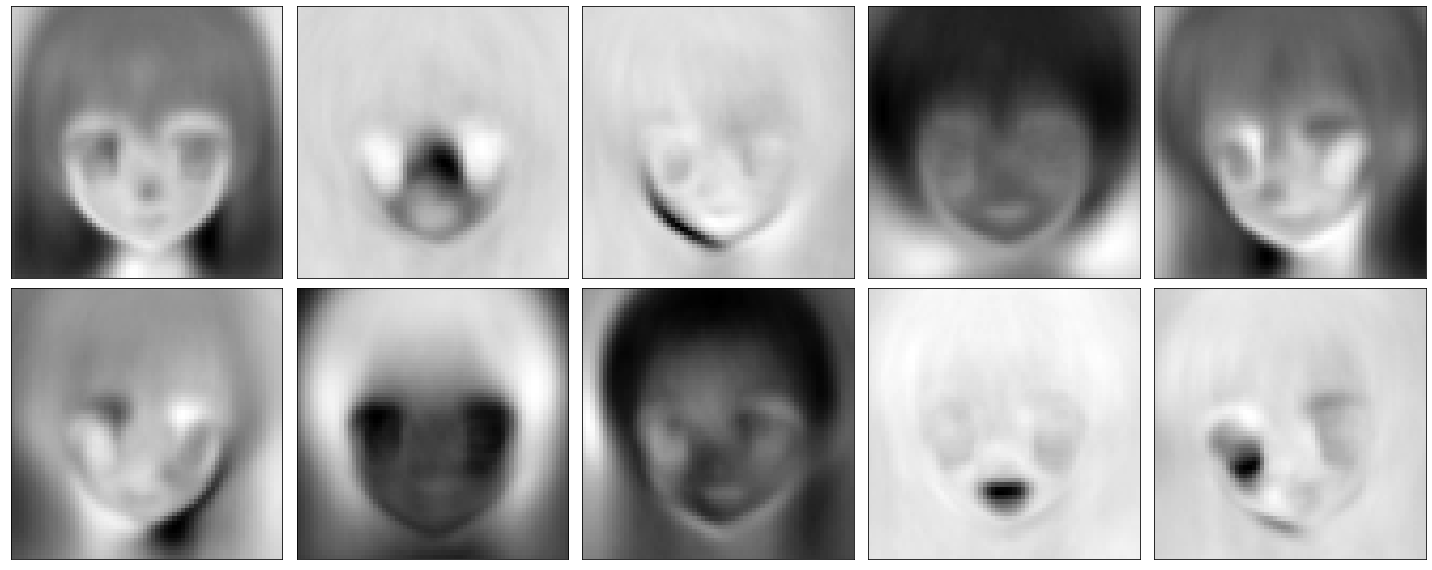

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8), subplot_kw={"xticks": (), "yticks": ()})
for ref, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    image = pca.inverse_transform(ref)
    image = np.reshape(image, IMAGE_SHAPE)
    ax.imshow(image, cmap=plt.cm.gray)
fig.tight_layout()

In [11]:
# samples = images[np.where(kmeans.labels_ == 4)]
# print(samples.shape)
# fig, axes = plt.subplots(2, 4, figsize=(16, 8), subplot_kw={"xticks": (), "yticks": ()})
# for image, ax in zip(samples, axes.ravel()):
#     ax.imshow(image, cmap=plt.cm.gray)
# fig.tight_layout()